# Combine all

In [4]:
import os
import pandas as pd
from datetime import datetime

#@ adding bestnum_algo names as a column to the results files
# Define the input and output directories
input_dir = 'whole_experiment'
df_all_results = pd.DataFrame()
# input_dir = 'only_graphopt_experiment'
files = [f for f in os.listdir(input_dir) if f.endswith('_ex.csv')]

for file in files:
    file_path = os.path.join(input_dir, file)
    size = int(file.split('_')[0])
    df = pd.read_csv(file_path)
    df['size'] = size
    df_all_results = pd.concat([df_all_results, df])

df_all_results = df_all_results.sort_values(by='size')

version = 'v' + datetime.today().strftime('%Y%m%d')
df_all_results.to_csv(f'whole_experiment/all_results_steady_ex_{version}.csv', index=False)

# ANALYSIS

In [44]:
import pandas as pd
data = pd.read_csv(r'whole_experiment\all_results_steady_ex_v20241230.csv')

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
wake_up_and_its_over = ['#62B8CE','#605E04', '#E5510D','#885B59','#892203']
mammalian_sighting_reflex = ['#C0000D','#17195C','#91A3B5','#0F0F29','#510C2D','#FCFCFC', '#bda5ad']

sns.set_palette(mammalian_sighting_reflex)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=mammalian_sighting_reflex)

In [46]:
melted_data = data.melt(id_vars=['layout', 'assortativity', 'graph_id', 'size'], 
                        value_vars=['AgglomerativeClustering', 'OPTICS', 'KMeans', 'GMM', 'Birch', 'Genie' ,'Girvan-Newman', 'Leiden'], 
                        var_name='Method', 
                        value_name='Score')
melted_data.head()

,layout,assortativity,graph_id,size,Method,Score
0,spring,0.665534,3,25,AgglomerativeClustering,0.573572
1,davidson_harel,0.665534,3,25,AgglomerativeClustering,0.279470
2,drl,0.665534,3,25,AgglomerativeClustering,0.210311
3,fruchterman_reingold,0.665534,3,25,AgglomerativeClustering,0.301371
4,graphopt,0.665534,3,25,AgglomerativeClustering,0.318553


# Plots

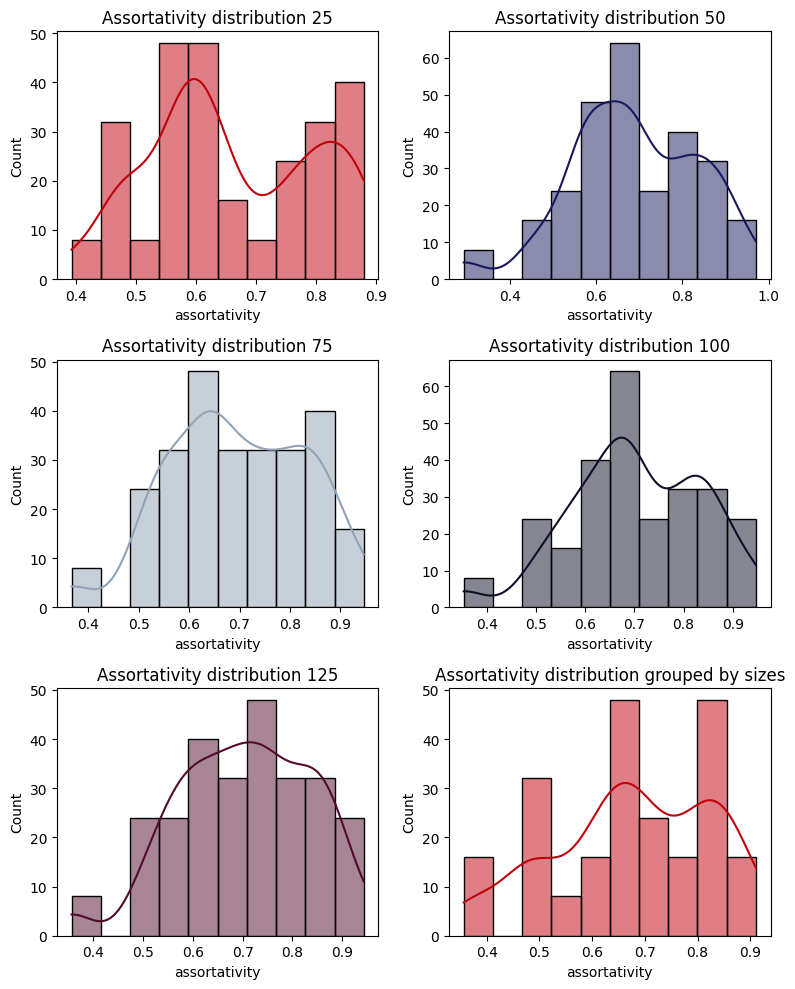

In [40]:
palette_dict = dict(zip(data['size'].unique(), ['#C0000D','#17195C','#91A3B5','#0F0F29','#510C2D','#C0000D']))
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()
unique_algos = data['size'].unique()

# Iterate over each subplot and unique bestnum_algo
for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = data[data['size'] == algo]
    sns.histplot(data=subset, x='assortativity', bins=10, kde=True, ax=ax, color=palette_dict[algo])
    # Customize the subplot
    ax.set_title(f'Assortativity distribution {algo}')
    ax.set_xlabel('assortativity')
    # ax.set_ylabel('Abs Diff')

plt.tight_layout()
plt.title('Assortativity distribution grouped by sizes')
plt.show()

C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\3675083132.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x='Method', y='Score', hue='layout', data=df, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)
C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\3675083132.py:25: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(x='Method', y='Score', hue='layout', data=df, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)


Text(0.5, 1.0, 'Score statistics grouped by clustering algrithms and layout')

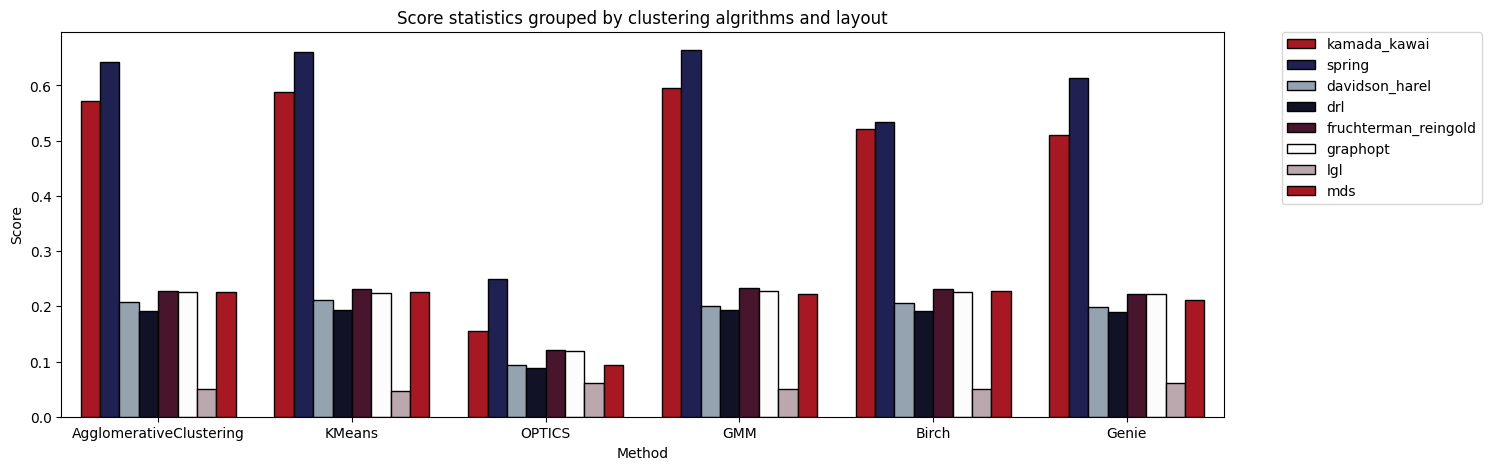

In [ ]:
import numpy as np
plt.figure(figsize=(15, 5))

desired_layout_order = ['kamada_kawai', 'spring', 'davidson_harel', 'drl', 'fruchterman_reingold', 'graphopt', 'lgl', 'mds']

layout_order_mapping = {layout: i for i, layout in enumerate(desired_layout_order)}

melted_data['layout_order'] = melted_data['layout'].map(layout_order_mapping)
melted_data = melted_data.sort_values(by='layout_order')
melted_data = melted_data.drop(columns=['layout_order'])

df = melted_data[~melted_data['Method'].isin(['Leiden', 'Girvan-Newman'])]

# ===
# df = melted_data[~melted_data['Method'].isin(['Leiden', 'Girvan-Newman'])]


ax=sns.barplot(x='Method', y='Score', hue='layout', data=df, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)
# general_avg = subset.groupby('layout_name')['abs_diff'].mean().reset_index()
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Score statistics grouped by clustering algrithms and layout')


<Axes: xlabel='Method', ylabel='Score'>

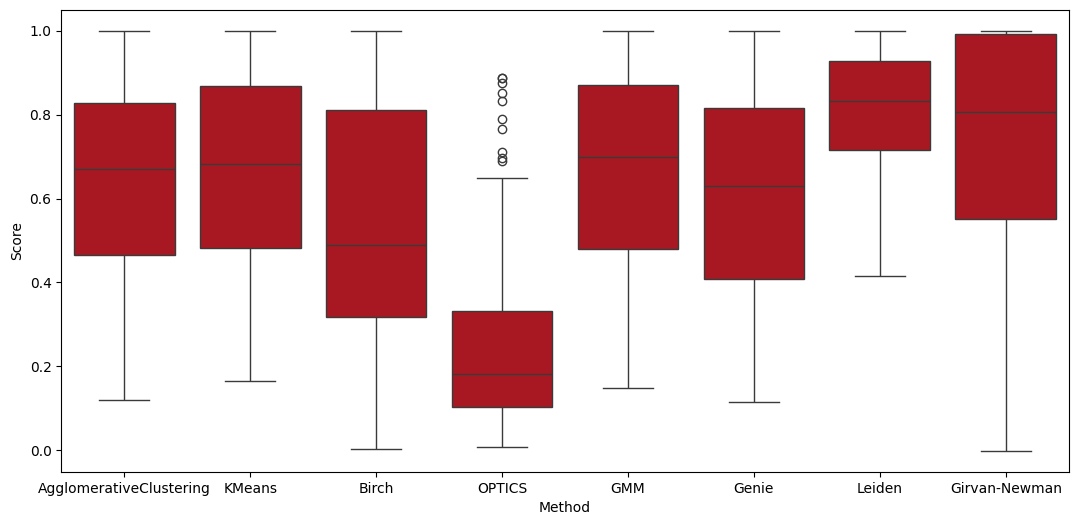

In [19]:
df = melted_data[melted_data['layout']=='spring']
plt.figure(figsize=(13, 6))
sns.boxplot(x="Method", y="Score", data=df )

In [60]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Get unique values of 'layout'
# layout_values = melted_data['layout'].unique()

# # Create subplots
# num_plots = len(layout_values)
# fig, axes = plt.subplots(nrows=((num_plots + 1) // 2) , ncols=2, figsize=(15, 5 * ((num_plots + 1) // 2)))

# axes = axes.flatten()

# # Plot each 'layout' value in a separate subplot
# for ax, layout in zip(axes, layout_values):
#     df = melted_data[melted_data['layout'] == layout]
#     sns.boxplot(x="Method", y="Score", data=df, ax=ax)
#     ax.set_title(f'Layout: {layout}')
#     ax.set_ylim(0, 1.1)  # Set y-axis limits from 0 to 1
#     ax.set_xlabel('Method')
#     ax.set_ylabel('Score')
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels by 45 degrees


# # Remove any empty subplots
# for i in range(len(layout_values), len(axes)):
#     fig.delaxes(axes[i])

# # Adjust layout
# plt.tight_layout()
# plt.suptitle('Boxplot of Scores for Each Layout', y=1.02)
# plt.show()

C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\1185531376.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x='size', y='Score', hue='Method', data=df, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)
C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\1185531376.py:7: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(x='size', y='Score', hue='Method', data=df, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)


Text(0.5, 1.0, 'Score statistics grouped by size and algorithm - only spring layout')

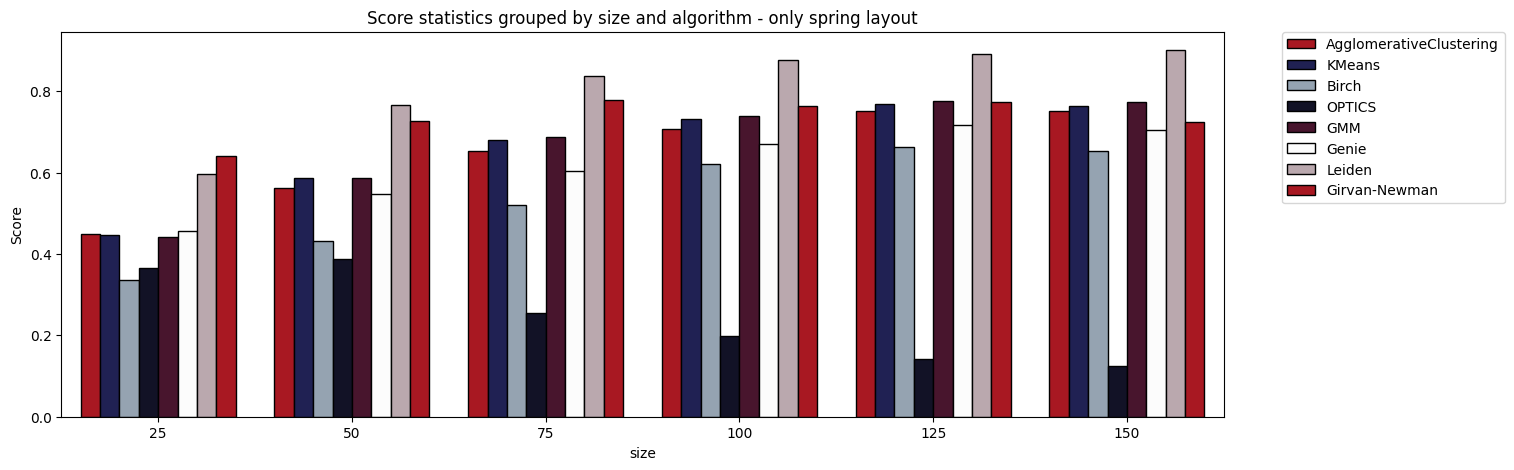

In [20]:
import numpy as np
plt.figure(figsize=(15, 5))

# df = melted_data[~melted_data['Method'].isin(['Girvan-Newman', 'Leiden'])]
df = melted_data[melted_data['layout']=='spring']

ax=sns.barplot(x='size', y='Score', hue='Method', data=df, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)
# general_avg = subset.groupby('layout_name')['abs_diff'].mean().reset_index()
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Score statistics grouped by size and algorithm - only spring layout')


C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\1201624390.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['assortativity_bin'] = pd.cut(df['assortativity'], bins=5)
C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\1201624390.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='assortativity_bin', y='Score', hue='Method', data=df, estimator=np.mean, ci=False, palette=mammalian_sighting_reflex, edgecolor='black')
C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\1201624390.py:15: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='assortativity_bin', y='Score', hue='Method', da

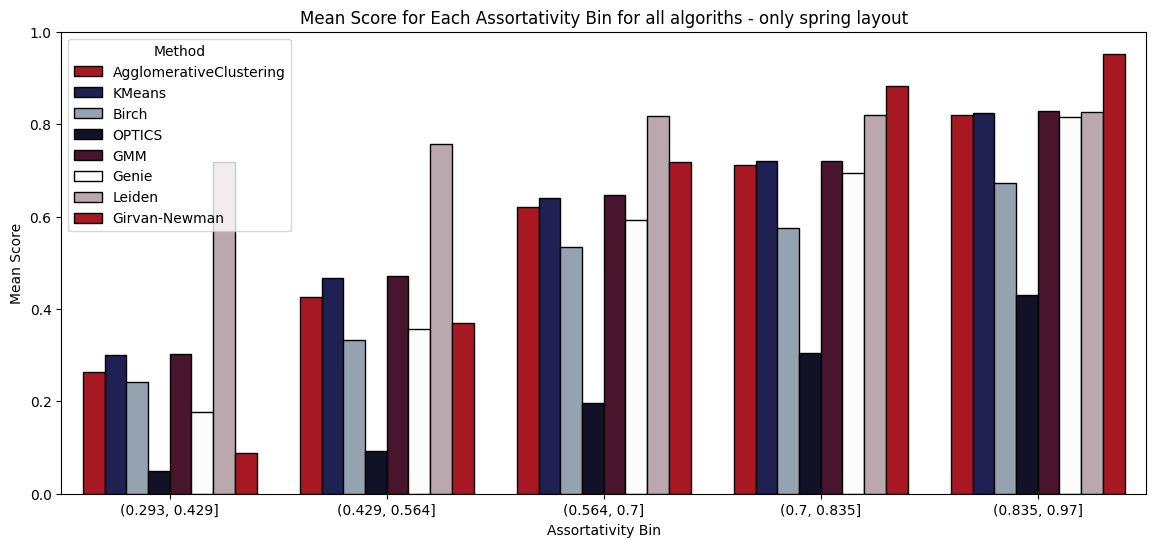

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
df = melted_data[melted_data['layout'] == 'spring']
# df = df[df['assortativity'] < .5]

# Bin the 'assortativity' values into 4 bins
df['assortativity_bin'] = pd.cut(df['assortativity'], bins=5)

# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='assortativity_bin', y='Score', hue='Method', data=df, estimator=np.mean, ci=False, palette=mammalian_sighting_reflex, edgecolor='black')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("Mean Score for Each Assortativity Bin for all algoriths - only spring layout")
plt.xlabel('Assortativity Bin')
plt.ylabel('Mean Score')
plt.legend(title='Method')
plt.show()

C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\3755250728.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Method', y='Score', data=df, estimator=np.mean,ci=False)


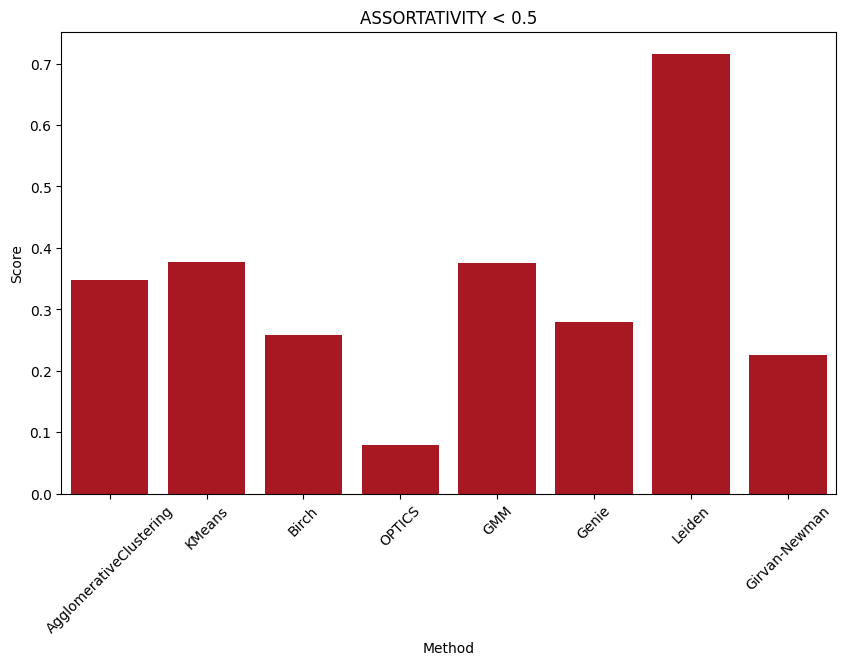

In [22]:
plt.figure(figsize=(10, 6))
df = melted_data[melted_data['layout']=='spring']
df = df[df['assortativity'] < .5]
sns.barplot(x='Method', y='Score', data=df, estimator=np.mean,ci=False)
plt.xticks(rotation=45)  # Rotate x-axis labels if neede
plt.title("ASSORTATIVITY < 0.5")
plt.show()

C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\3526416708.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Method', y='Score', data=df, estimator=np.mean,ci=False)


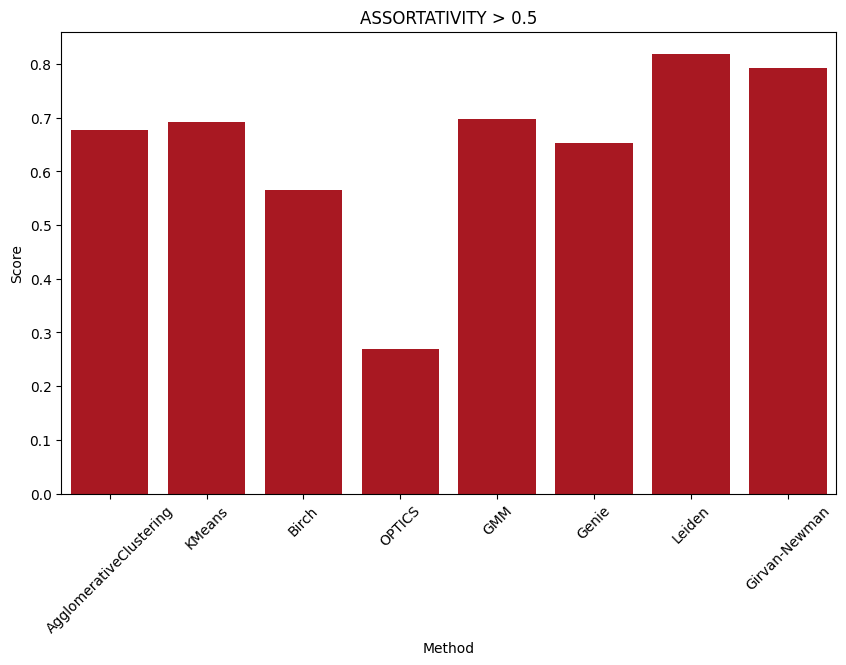

In [23]:
plt.figure(figsize=(10, 6))
df = melted_data[melted_data['layout']=='spring']
df = df[df['assortativity'] > .5]

sns.barplot(x='Method', y='Score', data=df, estimator=np.mean,ci=False)
plt.xticks(rotation=45)  # Rotate x-axis labels if neede
plt.title("ASSORTATIVITY > 0.5")

plt.show()

In [31]:
df.columns

Index(['layout', 'assortativity', 'graph_id', 'size', 'Method', 'Score'], dtype='object')

In [67]:
# # Create scatter plot
# plt.figure(figsize=(12, 8))
# df = melted_data[melted_data['layout']=='spring']
# df = df[~df['Method'].isin(['Girvan-Newman', 'Leiden'])]
# sns.scatterplot(x='assortativity', y='Score', hue='Method', data=df, palette=mammalian_sighting_reflex)

# # Customize the plot

C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\2494659111.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='assortativity', y='Score',data=method_data, ax=ax, palette=mammalian_sighting_reflex)
C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\2494659111.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='assortativity', y='Score',data=method_data, ax=ax, palette=mammalian_sighting_reflex)
C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\2494659111.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='assortativity', y='Score',data=method_data, ax=ax, palette=mammalian_sighting_reflex)
C:\Users\Kinga\AppData\Local\Temp\ipykernel_8084\2494659111.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='assortativity', y='Score',data=method_data, ax=ax, palette=mammalian_sighting_refl

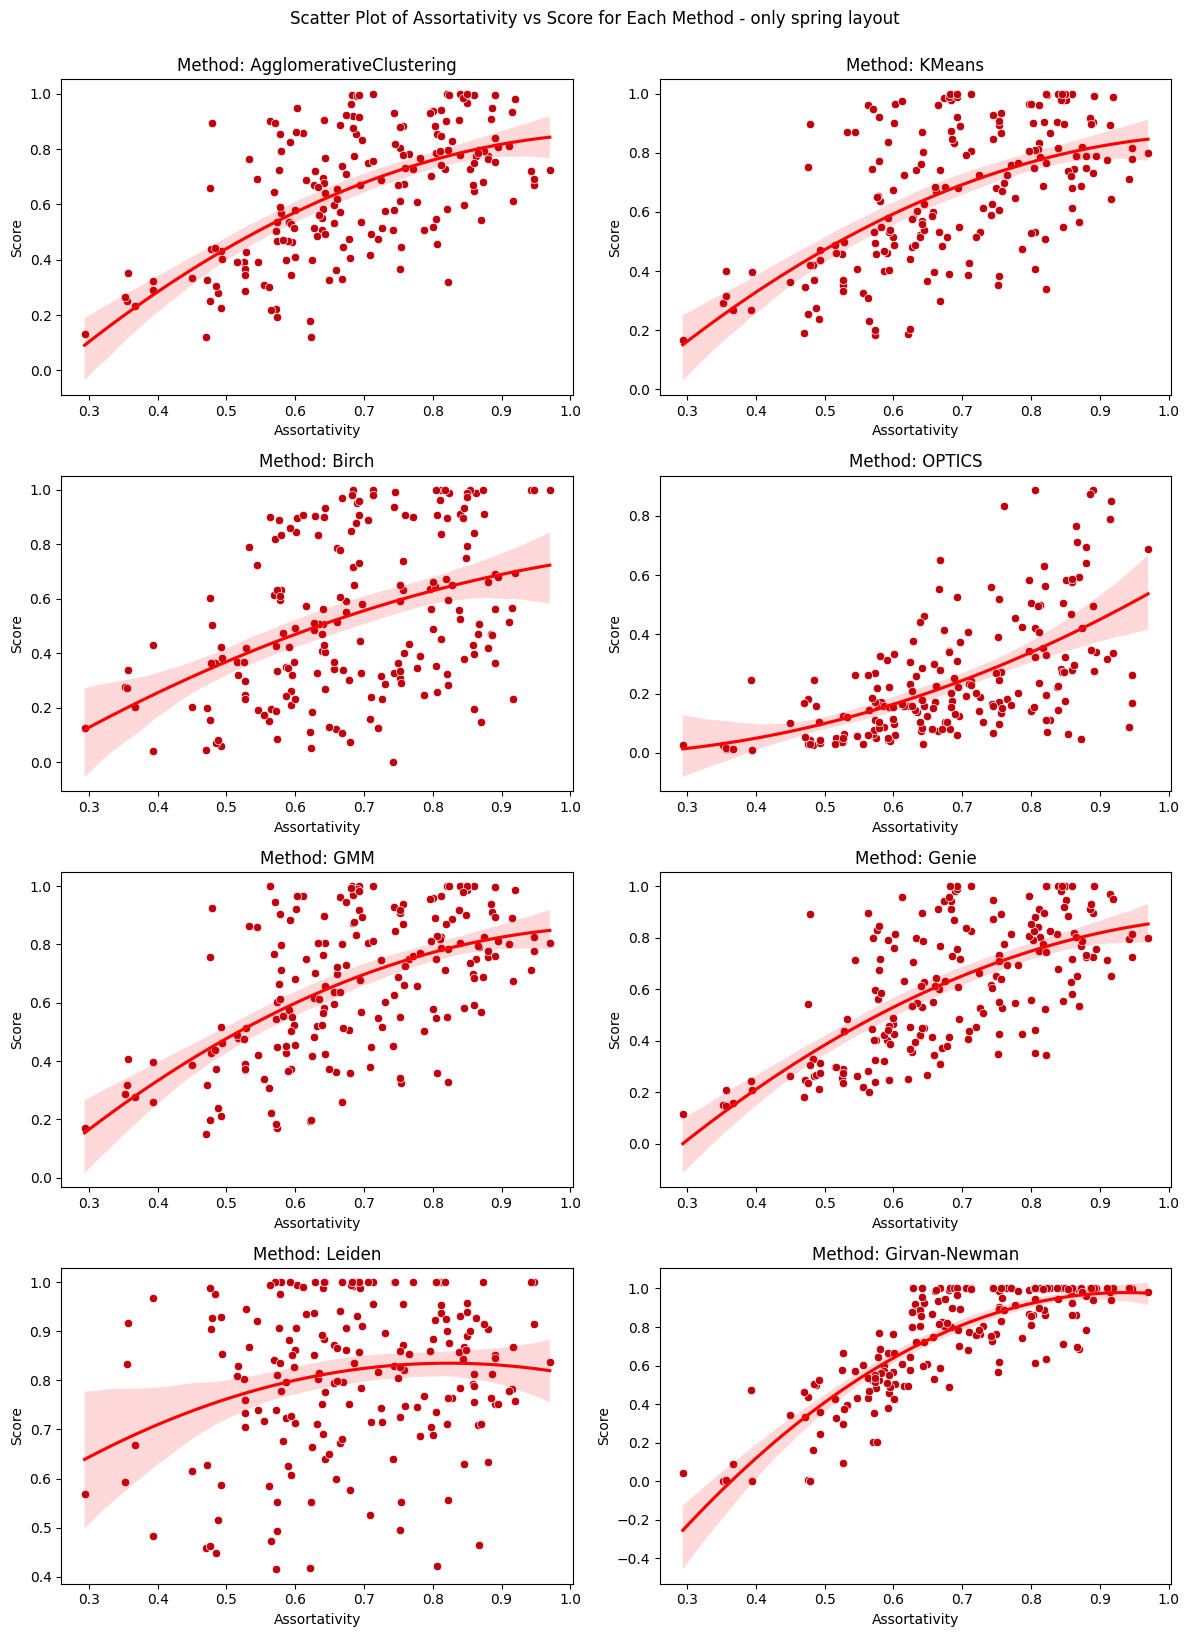

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
df = melted_data[melted_data['layout'] == 'spring']
# df = df[~df['Method'].isin(['Girvan-Newman', 'Leiden'])]
# df = melted_data.copy(deep=True)
# Get unique methods
methods = df['Method'].unique()

# Create subplots
num_methods = len(methods)
fig, axes = plt.subplots(nrows=(num_methods + 1) // 2, ncols=2, figsize=(12, 4 * ((num_methods + 1) // 2)))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each method in a separate subplot
for ax, method in zip(axes, methods):
    method_data = df[df['Method'] == method]
    sns.scatterplot(x='assortativity', y='Score',data=method_data, ax=ax, palette=mammalian_sighting_reflex)
    sns.regplot(x='assortativity', y='Score', data=method_data, ax=ax, scatter=False, color='red', order=2)
    ax.set_title(f'Method: {method}')
    ax.set_xlabel('Assortativity')
    ax.set_ylabel('Score')

# Remove any empty subplots
for i in range(len(methods), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.suptitle('Scatter Plot of Assortativity vs Score for Each Method - only spring layout', y=1.02)
plt.show()

In [70]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# clusters_columns = ['AgglomerativeClustering', 'OPTICS', 'KMeans', 'GMM', 'Birch', 'Girvan-Newman', 'Leiden']
# melted_data = data.melt(value_vars=clustears_columns, 
#                         var_name='Method', 
#                         value_name='Score')
# mean_values = melted_data.groupby('Method')['Score'].mean().reset_index()
# mean_values['Method'] = pd.Categorical(mean_values['Method'], categories=clusters_columns, ordered=True)
# mean_values = mean_values.sort_values('Method')
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Method', y='Score', data=mean_values)
# plt.show()

In [71]:
# df = data[data['assortativity']>.9]
# df = df[df['size']==25]
# clusters_columns = ['AgglomerativeClustering', 'OPTICS', 'KMeans', 'GMM', 'Birch', 'Girvan-Newman', 'Leiden']
# melted_data = df.melt(value_vars=clusters_columns, 
#                         var_name='Method', 
#                         value_name='Score')
# mean_values = melted_data.groupby('Method')['Score'].mean().reset_index()
# mean_values['Method'] = pd.Categorical(mean_values['Method'], categories=clusters_columns, ordered=True)
# mean_values = mean_values.sort_values('Method')
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Method', y='Score', data=mean_values)
# plt.show()